# House Prices King County

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set bins in tickers
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

## Load cleaned dataset

In [2]:
# load cleaned dataset
h_price = pd.read_csv("King_County_cleaned.csv")

## Overview

In [3]:
pd.set_option("display.max_columns", None)
h_price.describe().round(2)

,price,bedrooms,bathrooms,floors,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,date_m,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
count,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,17339.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00,21081.00
mean,540242.16,3.37,2.12,1.49,0.23,3.41,7.66,1971.02,83.12,98077.86,47.56,-122.21,6.58,193.27,1400.79,166.21,27.07,184.59,1182.92
std,366740.39,0.90,0.77,0.54,0.77,0.65,1.17,29.32,398.77,53.53,0.14,0.14,3.11,85.27,3825.22,76.96,41.06,63.69,2522.26
min,78000.00,1.00,0.50,1.00,0.00,1.00,3.00,1900.00,0.00,98001.00,47.16,-122.52,1.00,34.37,48.31,34.37,0.00,37.07,60.48
25%,322000.00,3.00,1.75,1.00,0.00,3.00,7.00,1952.00,0.00,98033.00,47.47,-122.33,4.00,132.85,468.23,111.48,0.00,138.43,473.81
50%,450000.00,3.00,2.25,1.50,0.00,3.00,7.00,1975.00,0.00,98065.00,47.57,-122.23,6.00,177.44,707.92,144.93,0.00,170.94,708.48
75%,645000.00,4.00,2.50,2.00,0.00,4.00,8.00,1997.00,0.00,98117.00,47.68,-122.12,9.00,236.90,993.88,205.32,52.03,219.25,937.30
max,7700000.00,11.00,8.00,3.50,4.00,5.00,13.00,2015.00,2015.00,98199.00,47.78,-121.32,12.00,1257.91,153416.27,874.22,447.79,576.93,80937.13


* maximal __lot__ is pretty high with 153416 $m^2$, probably farms

## Correlation matrix

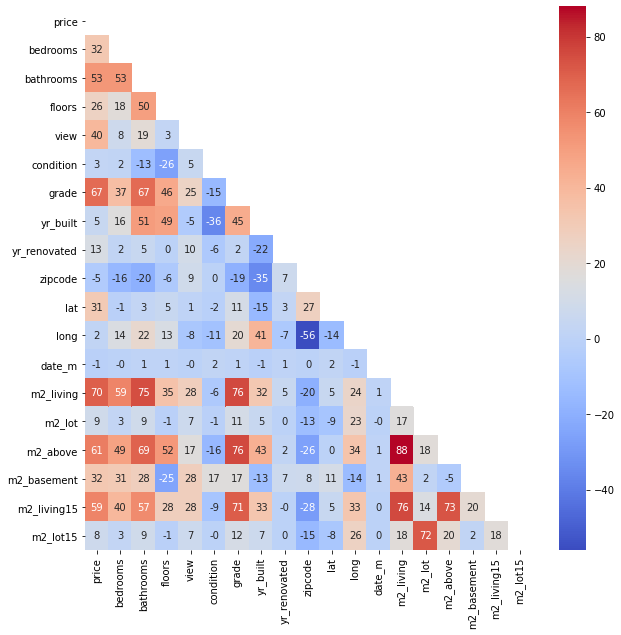

In [4]:
mask = np.triu(h_price.corr())
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(round(h_price.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')

__grade, view, bathrooms__ and __size__ show highest influence on price.

### Price & sqfeet

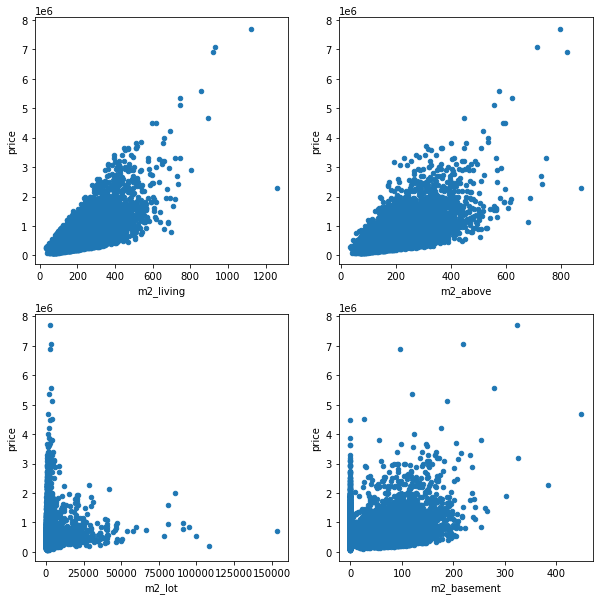

In [5]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
h_price.plot.scatter(x='m2_living', y='price', ax=axes[0][0])
h_price.plot.scatter(x='m2_lot', y='price', ax=axes[1][0])
h_price.plot.scatter(x='m2_above', y='price', ax=axes[0][1])
h_price.plot.scatter(x='m2_basement', y='price', ax=axes[1][1]);

* strong linear dependence for living size
* equal dependence of above size
* no systematic dependence on lot, high lots probably farms
* no systematic dependence for basement size

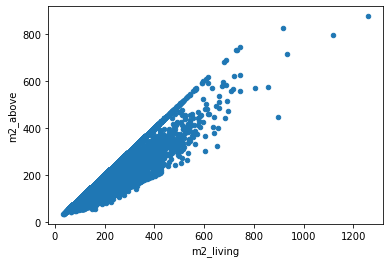

In [6]:
h_price.plot.scatter(x='m2_living', y='m2_above');

* very strong linear dependence, neglect m2 above to prevent multicollinearity

In [7]:
# Create column price / m^2
h_price['price_m2'] = h_price.price / h_price.m2_living.values

### Price & Rooms

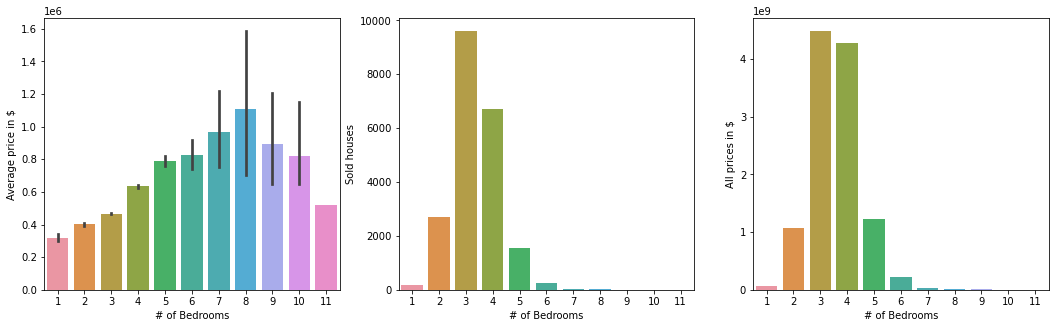

Text(0, 0.5, 'Living space in m^2')

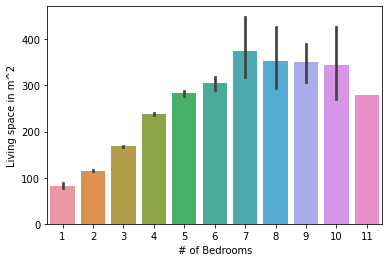

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='bedrooms', y='price', ax=axes[0])
sns.countplot(data=h_price, x='bedrooms', ax=axes[1])
pricexcount = h_price.groupby('bedrooms').price.mean() * h_price.groupby('bedrooms').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].set_xlabel('# of Bedrooms')
axes[1].set_xlabel('# of Bedrooms')
axes[2].set_xlabel('# of Bedrooms')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('Sold houses')
axes[2].set_ylabel('All prices in $')
plt.show()
sns.barplot(data=h_price, x='bedrooms', y='m2_living');
plt.xlabel('# of Bedrooms')
plt.ylabel('Living space in m^2')

* best price/selling rate is 3-4 bedrooms
* bedrooms > 7 less expensive
    * maybe families with many children, usually not have much money
    * maybe farms
    * maybe __not enough data__

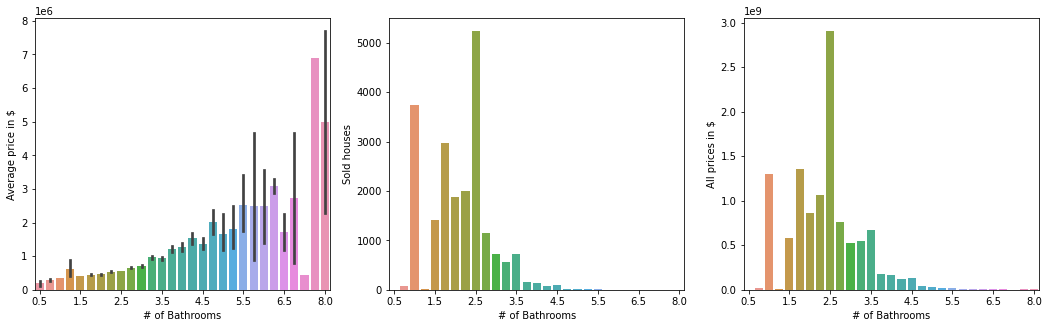

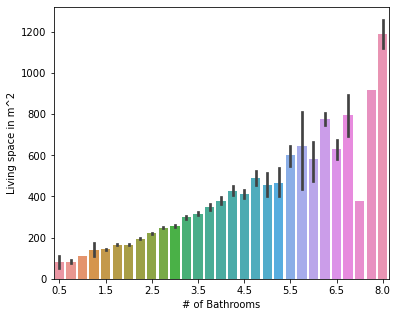

In [9]:
sns.color_palette("tab10")
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='bathrooms', y='price', ax=axes[0])
#axes[0].MaxNLocator(nbins=5, integer=True)
#h_price.groupby('bathrooms').mean().reset_index().plot.scatter(x='bathrooms', y='price', ax=axes[1])
sns.countplot(data=h_price, x='bathrooms', ax=axes[1]);
pricexcount = h_price.groupby('bathrooms').price.mean() * h_price.groupby('bathrooms').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[0].set_xlabel('# of Bathrooms')
axes[1].set_xlabel('# of Bathrooms')
axes[2].set_xlabel('# of Bathrooms')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('Sold houses')
axes[2].set_ylabel('All prices in $')
plt.show()
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=h_price, x='bathrooms', y='m2_living', ax=ax);
plt.xlabel('# of Bathrooms')
plt.ylabel('Living space in m^2')
ax.xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))

* bathrooms < 7: exponentail increase of price
* best price / sell rate for 2.5 bathrooms

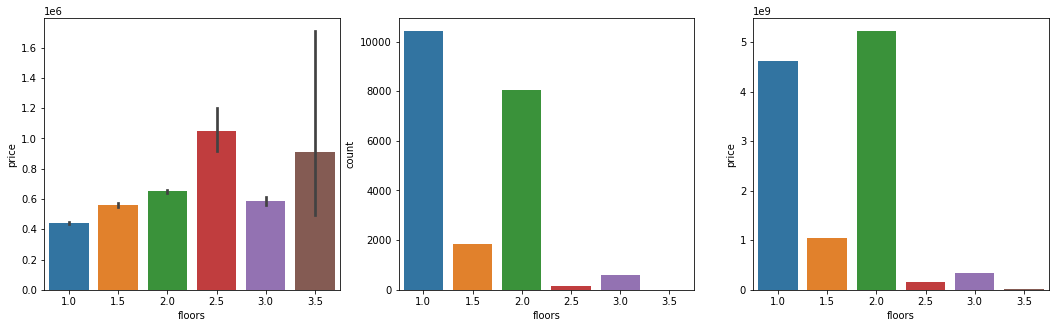

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='floors', y='price', ax=axes[0])
sns.countplot(data=h_price, x='floors', ax=axes[1]);
pricexcount = h_price.groupby('floors').price.mean() * h_price.groupby('floors').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);

* price higher for 2-2.5 floors
* most houses sold for 1 and 2 floors
* best selling / price rates at 1 and 2 floors

### Price & date

Text(0, 0.5, 'All prices in $')

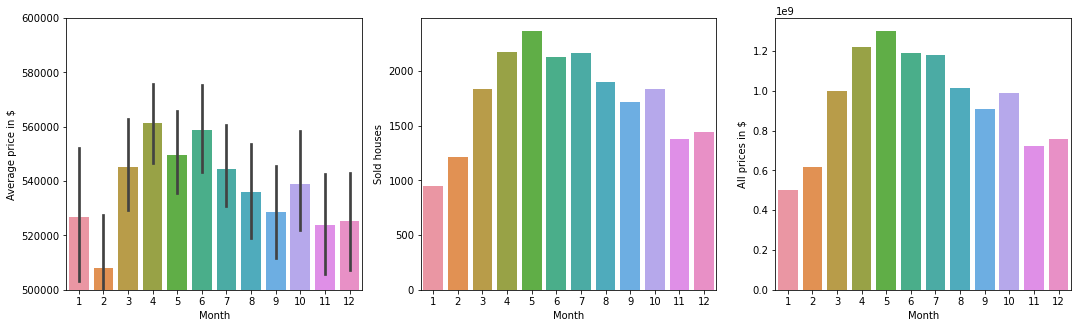

In [11]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='date_m', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='date_m', ax=axes[1]);
pricexcount = h_price.groupby('date_m').price.mean() * h_price.groupby('date_m').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);

axes[0].set_ylim(500000, 600000)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average price in $')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sold houses')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('All prices in $')

[paper month price correlation](http://www.normmiller.net/wp-content/uploads/2014/04/Seasonality-Of-Housing-Prices-JHR.pdf)
* more houses bought in summer
* more expensive in summer

### Price & Coordinates

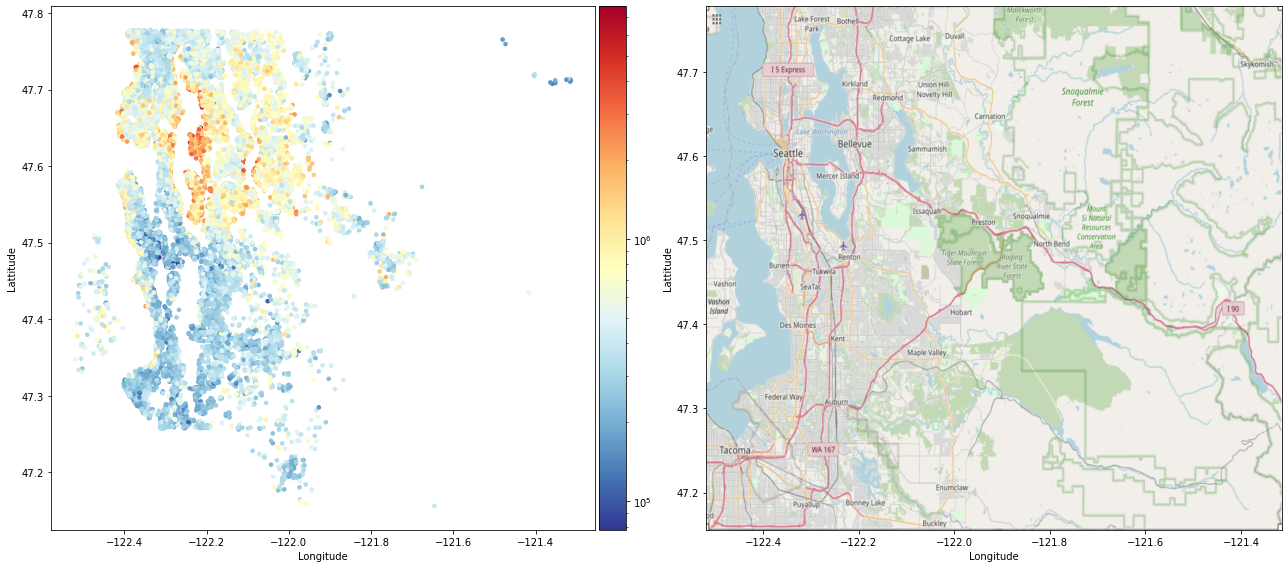

In [12]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,2, figsize=(18, 8))
# background image
img = plt.imread('imgs/map_KingCounty.png')
ax[1].imshow(img, extent=[h_price.long.min(), h_price.long.max(), h_price.lat.min(), h_price.lat.max()], aspect="auto")
cm = plt.cm.get_cmap('RdYlBu_r')
x = h_price.long.values# - h_price.long.min())/(h_price.long.max()-h_price.long.min())*1000
y = h_price.lat.values# - h_price.lat.min())/(h_price.lat.max()-h_price.lat.min())* 1000
z = h_price.price.values
sc = ax[0].scatter(x, y, c=z, cmap=cm, norm=matplotlib.colors.LogNorm(), s=13)

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

#plt.colorbar(im, cax=cax)
plt.colorbar(sc, cax=cax);
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Lattitude')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Lattitude')
#ax.set_xlim(h_price.long.min(), h_price.long.max())
#ax.set_ylim(h_price.lat.min(), h_price.lat.max())
plt.tight_layout()

You can clearly see, that there are __cheap__ and __expensive areas__. Expensive areas are mostly __near the water__ and in the middle of __city center__!

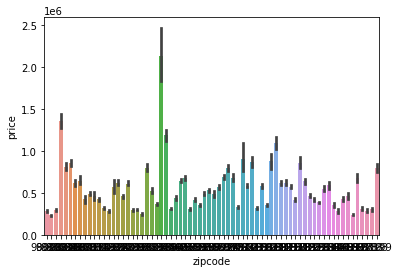

In [13]:
# Check different zip codes
sns.barplot(data = h_price, x = 'zipcode', y = 'price');

Prices vary a lot for different zipcodes -> __use__ them as __dummy__ variables!

In [14]:
# Create a new column for cities, instead of zip codes
# List of zips
zips = '98002 98092 98224 98004 98005 98006 98007 98008 98010 98011 98178 98148 98166 98014 98077 98042 98198 98019 98031 98022 98058 98024 98003 98023 98027 98029 98028 98032 98030 98033 98034 98001 98038 98039 98040 98045 98047 98050 98051 98052 98055 98056 98057 98059 98074 98075 98188 98199 98174 98154 98158 98164 98101 98102 98103 98104 98105 98106 98107 98108 98109 98112 98115 98116 98117 98118 98119 98121 98122 98125 98126 98133 98134 98136 98144 98155 98177 98288 98065 98168 98053 98195 98070 98146 98072'
# List of corresponding cities
cities = 'Auburn Auburn Baring Bellevue Bellevue Bellevue Bellevue Bellevue Black Bothell Bryn Burien Burien Carnation Cottage Covington Des Duvall East Enumclaw Fairwood Fall Federal Federal Issaquah Issaquah Kenmore Kent Kent Kirkland Kirkland Lakeland Maple Medina Mercer North Pacific Preston Ravensdale Redmond Renton Renton Renton Renton Sammamish Sammamish SeaTac Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Shoreline Shoreline Skykomish Snoqualmie Tukwila Union Univ Vashon White Woodinville'
zips = zips.split(' ')
cities = cities.split(' ')
dic = dict(zip(zips,cities))
h_price['city'] = [dic[str(i)] for i in h_price.zipcode.values]

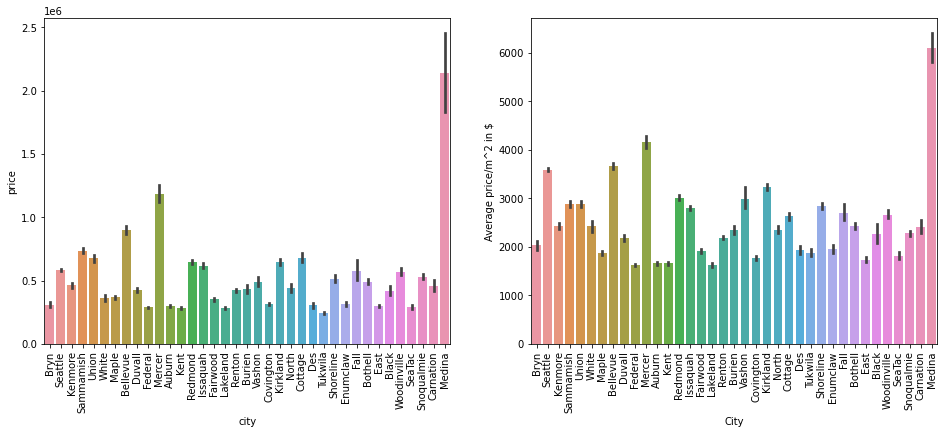

In [15]:
# Plot price and price/m^2 for each city
fig, ax = plt.subplots(1,2, figsize=(16,6))
chart = sns.barplot(data = h_price, x = 'city', y = 'price', ax=ax[0]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.xlabel('City')
plt.ylabel('Average price in $');
chart = sns.barplot(data = h_price, x = 'city', y = 'price_m2', ax=ax[1]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.xlabel('City')
plt.ylabel('Average price/m^2 in $');

Like for zipcodes, we see different prices for different regions.

### Price & Grades / condition

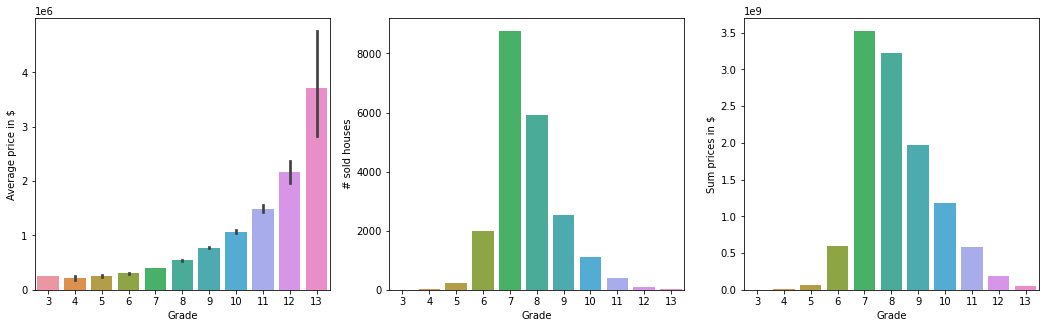

In [16]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='grade', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='grade', ax=axes[1]);
pricexcount = h_price.groupby('grade').price.mean() * h_price.groupby('grade').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].set_xlabel('Grade')
axes[1].set_xlabel('Grade')
axes[2].set_xlabel('Grade')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('# sold houses')
axes[2].set_ylabel('Sum prices in $');
#axes[0].axhline(h_price.price.mean())

* price is exponentially related to grade
* buyers interest starts at grade 7

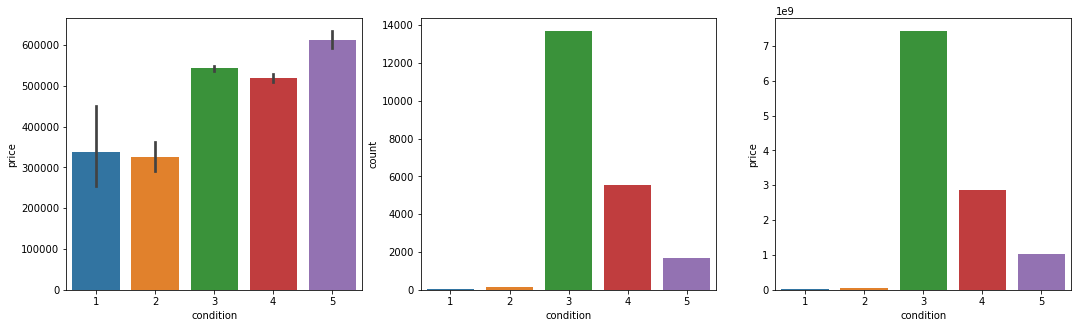

In [17]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='condition', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='condition', ax=axes[1]);
pricexcount = h_price.groupby('condition').price.mean() * h_price.groupby('condition').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);

* count for condition < 3 neglectable
* price not considerably rising after 3

### Price & view / waterfront

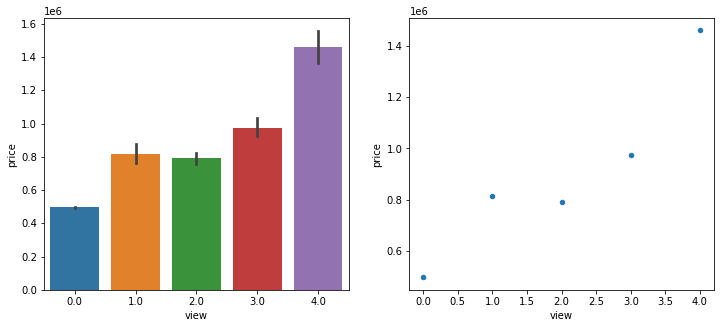

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=h_price, x='view', y='price', ax=axes[0]);
h_price.groupby('view').mean().reset_index().plot.scatter(x='view', y='price', ax=axes[1]);

__Linear dependency__ between view and price!

### Price & year built / year renovated

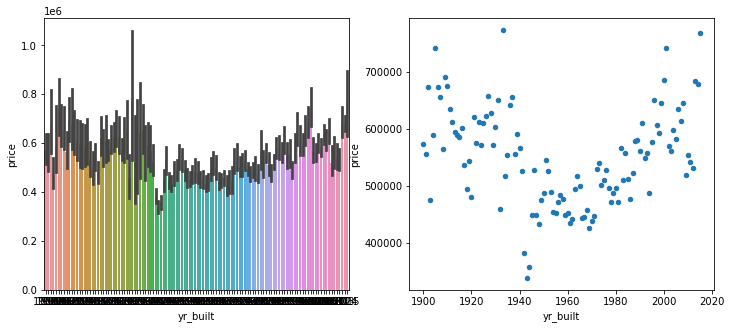

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=h_price, x='yr_built', y='price', ax=axes[0]);
h_price.groupby('yr_built').mean().reset_index().plot.scatter(x='yr_built', y='price', ax=axes[1]);

* best building years are oldest and newest
    * new are better buildings
    * old have old character

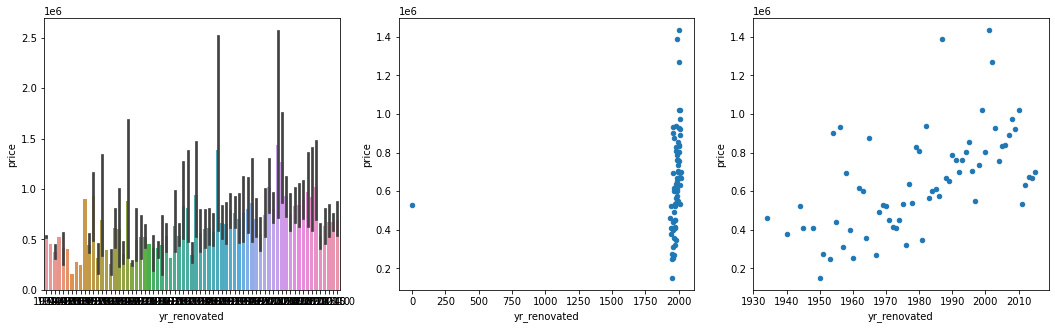

In [20]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='yr_renovated', y='price', ax=axes[0]);
h_price.groupby('yr_renovated').mean().reset_index().plot.scatter(x='yr_renovated', y='price', ax=axes[1]);
### find outlier in yr renovated:
h_price.query('yr_renovated == 0').shape
h_price.query('yr_renovated > 0').groupby('yr_renovated').mean().reset_index().plot.scatter(x='yr_renovated', y='price', ax=axes[2]);
# almost no observations have yr-renovated, so keep it out

* 18% of yr renovated values missing
* linear dependency: newer renovation -> higher price

### Price & size

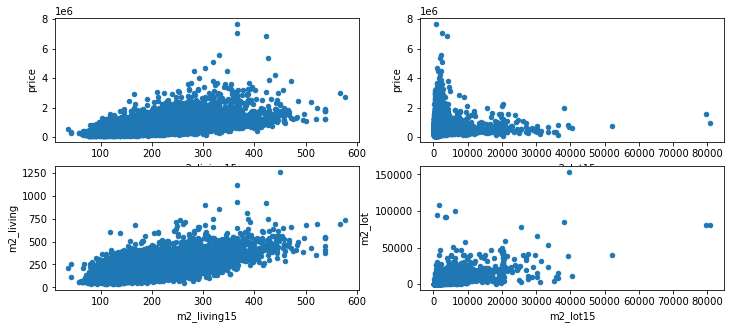

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
h_price.plot.scatter(x='m2_living15', y='price', ax=axes[0][0]);
h_price.plot.scatter(x='m2_lot15', y='price', ax=axes[0][1]);
# Check correlation with real values
h_price.plot.scatter(x='m2_living15', y='m2_living', ax=axes[1][0]);
h_price.plot.scatter(x='m2_lot15', y='m2_lot', ax=axes[1][1]);

* strong correlation between living, living 15
* strong correlation between lot, lot 15